## Chapter 2. Data and Sampling Distributions

필요한 패키지들을 먼저 설치해줍니다.

In [2]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import expon
from scipy.stats import weibull_min

import itertools

In [3]:
DATA = 'c:\\Users\\jmjwj\\workspace\\HD'
SP500_DATA_CSV = DATA + '\\sp500_data.csv.gz'

## Standard Normal and QQ-Plots
scipy 패키지 내의 함수 scipy.stats.probplot 를 활용해서 QQ-plot을 그릴 수 있습니다.(정규성 확인)

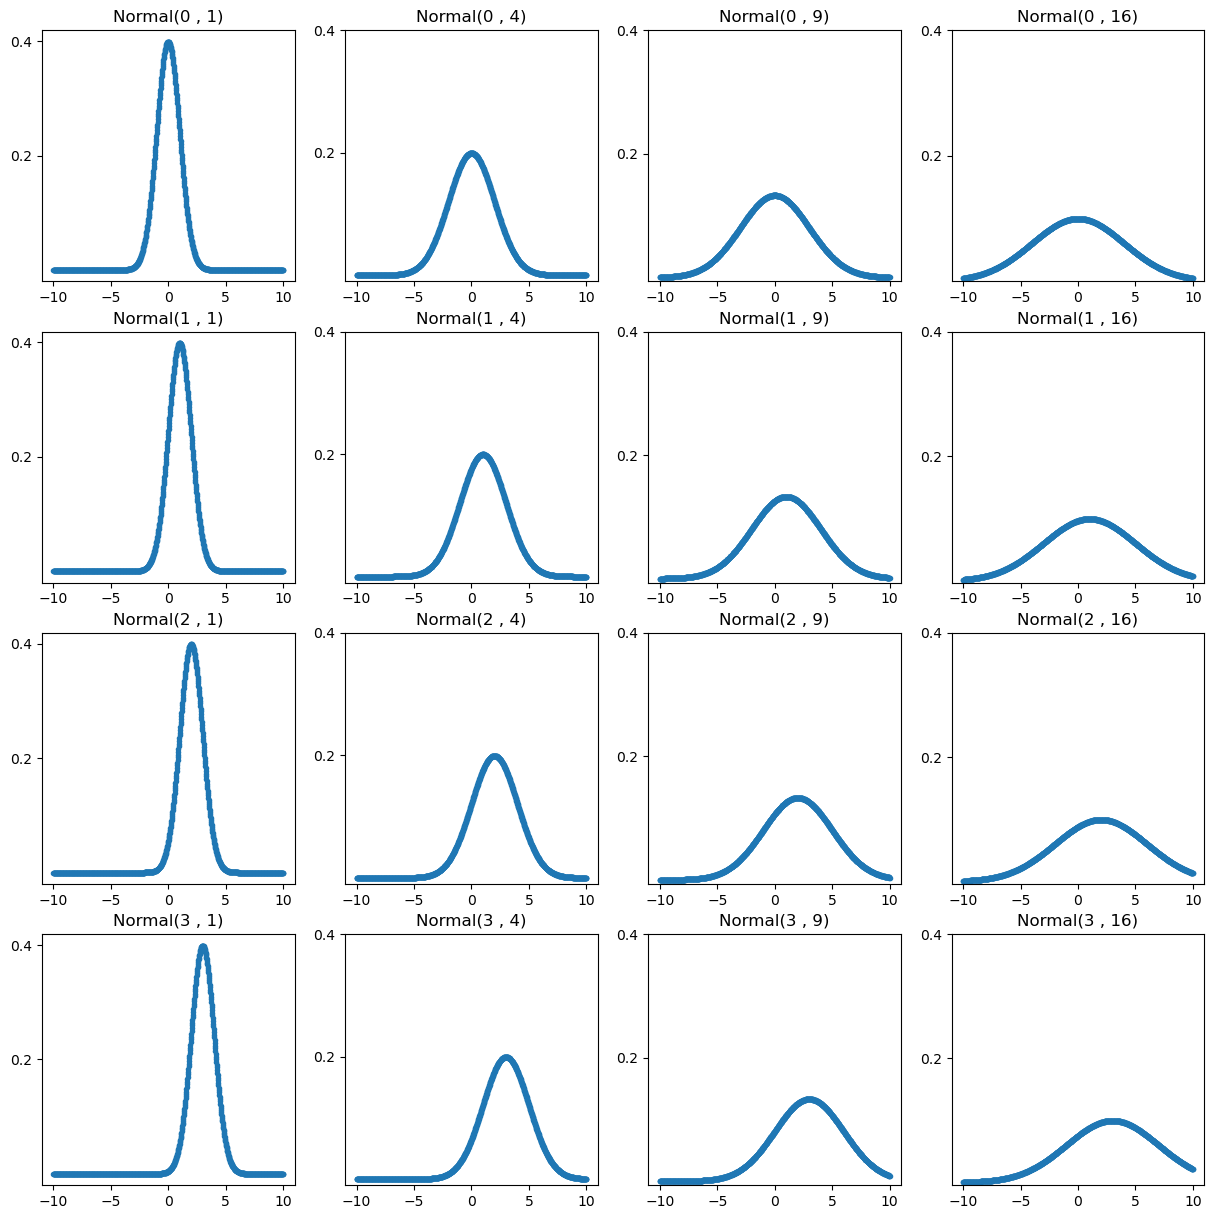

In [4]:
# Normal 분포의 pmf와 cdf 그려보기

fig, ax = plt.subplots(ncols = 4, nrows = 4, figsize = (15,15))

mean_grid = [0,1,2,3]
std_grid = [1,2,3,4]

combinations = np.array(np.meshgrid(mean_grid, std_grid)).T.reshape(-1, 2)
comb_matrix = combinations.reshape(len(mean_grid), len(std_grid), 2)
# meshgrid 코드를 사용하여 mean 과 std의 모든 가능한 조합을 다룰 수 있는 행렬 comb_matrix를 생성

for i in range(4):
    for j in range(4):
        mean = comb_matrix[i][j][0]
        std = comb_matrix[i][j][1]
        x = np.linspace(-10, 10, 1000)
        pdf = stats.norm.pdf(x, mean, std)

        ax[i][j].scatter(x= x, y = pdf, label = 'pdf', linestyle = '-', marker = '.')
        ax[i][j].set_yticks([0.2, 0.4])
        ax[i][j].set_title("Normal(%d , %d)" %(mean, std**2))

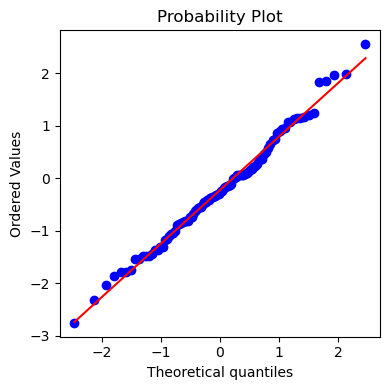

In [5]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax, dist = 'norm')
#분위수 플롯

plt.tight_layout()
plt.show()

# 정규분포에서 추출된 표본이므로, QQplot은 일직선에 가깝게 나타난다.

## Long-Tailed Distributions


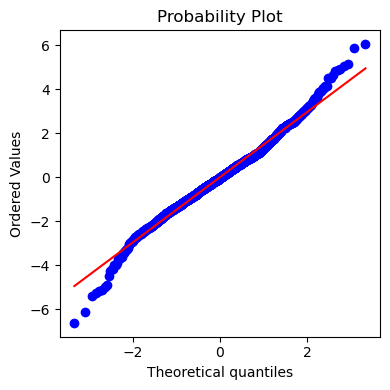

In [6]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

# 꼬리가 두껍고 긴 분포를 따름을 의미한다.

## Binomial Distribution



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


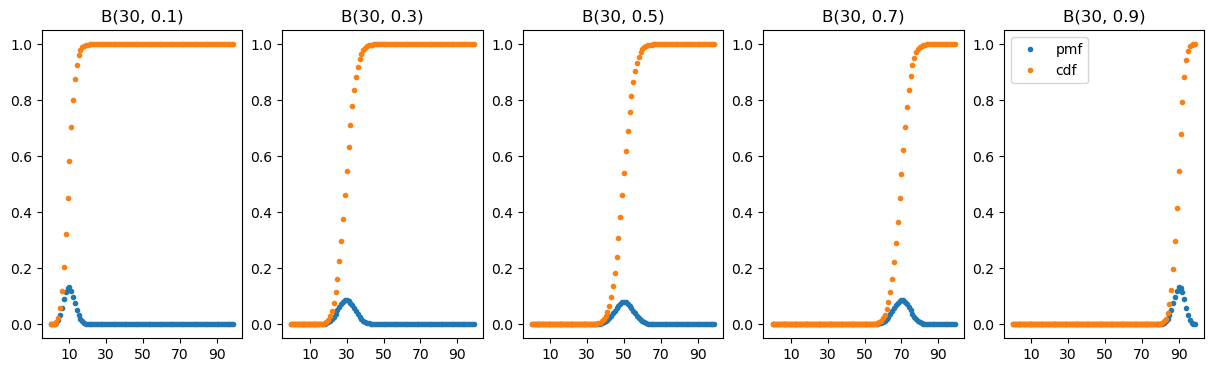

In [7]:
# binomial 분포의 pmf와 cdf 그려보기

fig, ax = plt.subplots(ncols = 5, figsize = (15,4))

p_grid = [0.1, 0.3, 0.5, 0.7, 0.9]
for i,p in enumerate(p_grid):
    pmf = []
    cdf = []
    for x in range(100):
        pmf.append(stats.binom.pmf(x, n=100, p=p))
        cdf.append(stats.binom.cdf(x, n=100, p=p))
    ax[i].plot(pmf, label = 'pmf', linestyle = '', marker = '.')
    ax[i].plot(cdf, label = 'cdf', linestyle = '', marker = '.')
    ax[i].set_title("B(30, %.1f)" %p)
    ax[i].set_xticks([10,30,50,70,90])
    plt.legend()

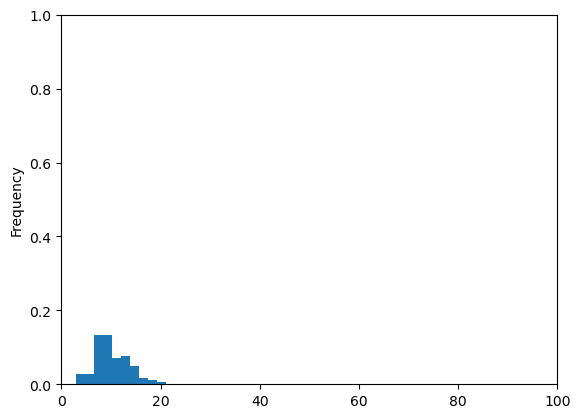

In [8]:
#binomial 분포의 sampling을 이용한 경험적 pmf

fig, ax = plt.subplots()

sample = stats.binom.rvs(n = 100, p = 0.1, size = 100)
pd.Series(sample).plot.hist(density = True)

ax.set_ylim(0,1)
ax.set_xlim(0,100)
plt.show()

## Poisson Distributions


## 

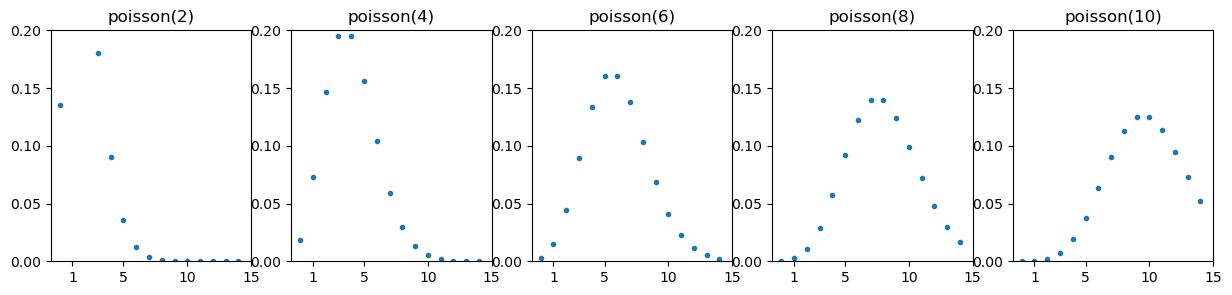

In [9]:
# poisson 분포의 pmf와 cdf 그려보기

fig, ax = plt.subplots(ncols = 5, figsize = (15,3))

lambda_grid = [2, 4, 6, 8, 10]
for i, lam in enumerate(lambda_grid):
    pmf = []
    for x in range(15):
        pmf.append(stats.poisson.pmf(x, lam))
        
    ax[i].plot(pmf, label = 'pmf', linestyle = '', marker = '.')
    ax[i].set_title("poisson(%d)" %lam)
    ax[i].set_xticks([1,5,10,15])
    ax[i].set_ylim([0,0.2])
    ax[i].set_yticks([0, 0.05, 0.1, 0.15, 0.2])



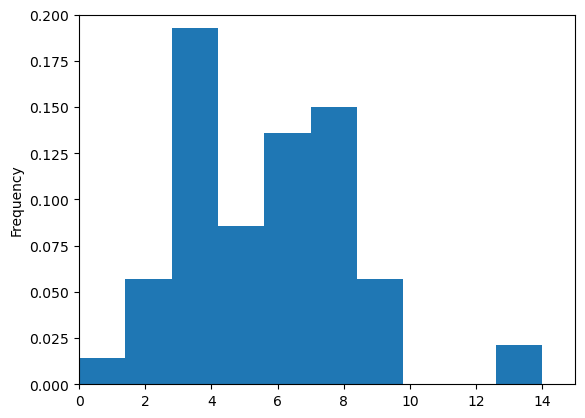

In [10]:
# 포아송 분포에서 샘플링 하여 경험적인 pmf그려보기

fig, ax = plt.subplots()

sample = stats.poisson.rvs(6, size=100)

pd.Series(sample).plot.hist(density= True)

ax.set_ylim(0,0.2)
ax.set_xlim(0,15)
plt.show()

## Exponential Distribution


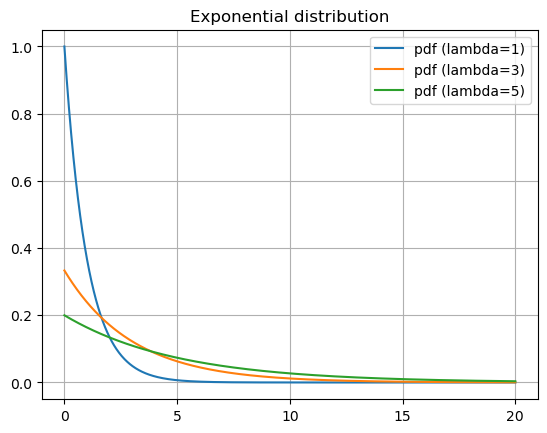

In [11]:
scale_grid = [1,3,5]
fig, ax = plt.subplots()

for i, lam in enumerate(scale_grid):
    x = np.linspace(0, 20, 1000)
    y = expon.pdf(x, scale=lam)  # lambda=1인 지수 분포

    # 그래프 그리기
    ax.plot(x, y, label='pdf (lambda=%d)' %lam)
    ax.legend()
    ax.grid(True)
    ax.set_title('Exponential distribution')
    ax.set_xticks([0,5,10,15,20])
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1])
    
    
plt.show()

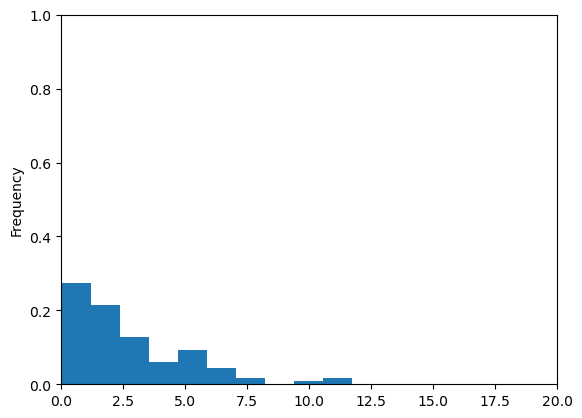

In [12]:
fig, ax = plt.subplots()

sample = stats.expon.rvs(scale=3, size=100)
pd.Series(sample).plot.hist(density = True)

ax.set_ylim(0,1)
ax.set_xlim(0,20)
plt.show()


## Weibull Distribution


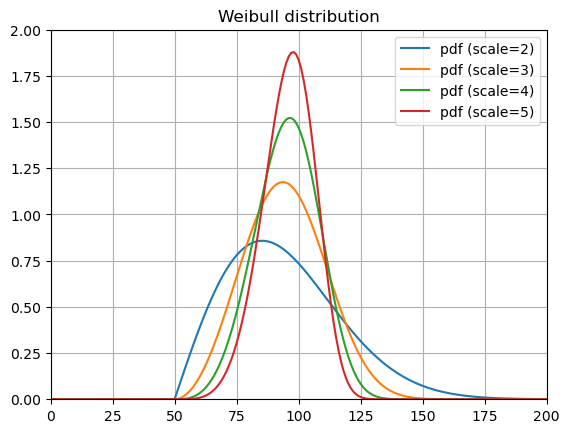

In [13]:
# Normal 분포의 pmf와 cdf 그려보기

fig, ax = plt.subplots()

scale_grid = [2,3,4,5]
shape = 1

for i, scale in enumerate(scale_grid):
    x = np.linspace(0, 20, 1000)
    pdf = stats.weibull_min.pdf(x, scale, shape)
    ax.plot(pdf,  label='pdf (scale=%d)' %scale)
    ax.grid(True)
    ax.set_title("Weibull distribution")
    ax.set_ylim([0, 2])
    ax.set_xlim([0,200])
    ax.legend()